In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pylab as plt

import matplotlib.tri as tri
from matplotlib import cm

## function

In [2]:
def interpolator(grid_lst, coord_lst, x_tuple=(-30, 30, 161), y_tuple=(-20, 30, 121)):
    grid_xx = [item[0] for item in grid_lst]
    grid_yy = [item[1] for item in grid_lst]
    grid_loss = [item[3] for item in grid_lst]
    
    coord_xx = [item[0] for item in coord_lst]
    coord_yy = [item[1] for item in coord_lst]
    coord_loss = [item[3] for item in coord_lst]

    x_inter = np.hstack([np.array(grid_xx), np.array(coord_xx)])
    y_inter = np.hstack([np.array(grid_yy),np.array(coord_yy)])
    z_inter = np.hstack([np.array(grid_loss), np.array(coord_loss)])
    interpolator = tri.LinearTriInterpolator(tri.Triangulation(x_inter, y_inter), z_inter)

    xi = np.linspace(x_tuple[0], x_tuple[1], x_tuple[2])
    yi = np.linspace(y_tuple[0], y_tuple[1], y_tuple[2])
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    return xi, yi, zi

In [3]:
def draw_one(coord, xi, yi, zi, x_tuple=(-35, 45), y_tuple=(-40, 45), max_val=6, interval=0.01, title='', \
    loc='upper right', legend='', cbar=False, x_label=''):
    zi[zi>max_val] = max_val
    zi[np.isnan(zi)] = max_val
    CS = plt.contour(xi, yi, zi, levels=np.arange(0, max_val, interval), cmap=cm.coolwarm)
    
    clst = ['indigo', 'deeppink', 'darkgreen', 'darkorange']
    plt.plot(coord[120:180, 0], coord[120:180, 1], marker='o', c=clst[0])
    plt.plot(coord[180:240, 0], coord[180:240, 1], marker=',', c=clst[1])
    plt.plot(coord[0:60, 0], coord[0:60, 1], marker='.', c=clst[2])
    plt.plot(coord[60:120, 0], coord[60:120, 1], marker='.', c=clst[3])

    plt.plot(coord[0:1, 0], coord[0:1, 1], marker='o', c='crimson')
    plt.plot(coord[60:61, 0], coord[60:61, 1], marker='o', c='crimson')
    plt.plot(coord[120:121, 0], coord[120:121, 1], marker='o', c='crimson')
    plt.xlim([x_tuple[0], x_tuple[1]])
    plt.ylim([y_tuple[0], y_tuple[1]])

    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    if legend:
        l = plt.legend(legend, loc=loc)
        for cnt, text in enumerate(l.get_texts()):
            text.set_color(clst[cnt])

    if cbar:
        return CS
        

## Load data

In [4]:
infos = []
datasets = ['cifar10', 'cifar100']
methods = ['Base', 'dml', 'KDCL']
for dd in datasets:
    for mm in methods:
        coord = pkl.load(open(f'./{dd}_{mm}_coord.pkl', 'rb'))
        coord_lst = pkl.load(open(f'./{dd}_{mm}_coord_lst.pkl', 'rb'))
        grid_lst = pkl.load(open(f'./{dd}_{mm}_grid_lst.pkl', 'rb'))
        infos.append((coord_lst, grid_lst, coord))

In [5]:
xy_bound = np.array([
    [-25, 30, -25, 35], 
    [-25, 25, -20, 30], 
    [-15, 30, -25, 25], 
    [-40, 40, -30, 50], 
    [-35, 45, -40, 45], 
    [-25, 45, -35, 35]
])

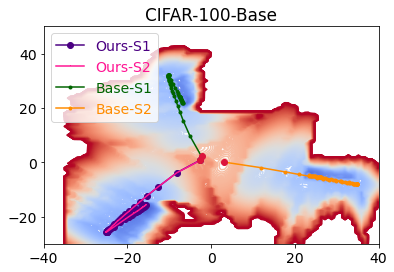

In [12]:
plt.figure()
plt.rcParams.update({'font.size': 14})
xi, yi, zi = interpolator(infos[4][1], infos[4][0], x_tuple=(-40, 40, 101), y_tuple=(-30, 50, 101))
draw_one(infos[4][2], xi, yi, zi, x_tuple=(-40, 40, 101), y_tuple=(-30, 50, 101), title='CIFAR-100-Base', loc='upper left', \
    legend=['Ours-S1', 'Ours-S2', 'Base-S1', 'Base-S2'])


## draw 6 figs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


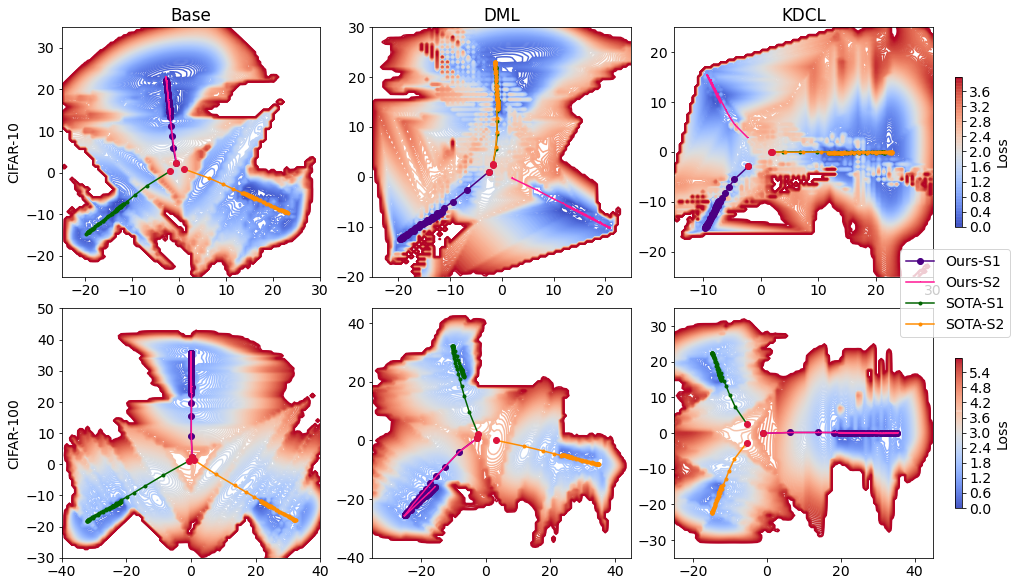

In [14]:
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 3, figsize=(14,8), constrained_layout=True)

plt.subplot(231)
plt.ylabel('CIFAR-10')
ii = 0
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.03, max_val=4.0, title='Base')

plt.subplot(232)
ii = 1
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.03, max_val=4.0, title='DML')

plt.subplot(233)
ii = 2
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
pcm=draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.02, max_val=4.0, title='KDCL',\
        cbar=True, loc='upper center')
fig.colorbar(pcm, ax=[axs[0, 2:3]], location='right', label='Loss', shrink=0.6)

plt.subplot(234)
plt.ylabel('CIFAR-100')
ii = 3
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0)

plt.subplot(235)
ii = 4
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0)

plt.subplot(236)
ii = 5
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
pcm=draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0,\
        cbar=True, loc='upper center')

fig.colorbar(pcm, ax=[axs[1, 2:3]], location='right', label='Loss', shrink=0.6,)
fig.legend(['Ours-S1', 'Ours-S2', 'SOTA-S1', 'SOTA-S2'], loc='center right')
plt.savefig("../figs/resnet32.eps",format='eps',dpi=100, bbox_inches = 'tight')
plt.subplot_tool()
plt.show()

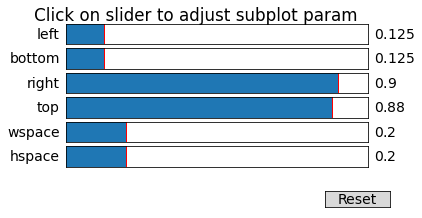

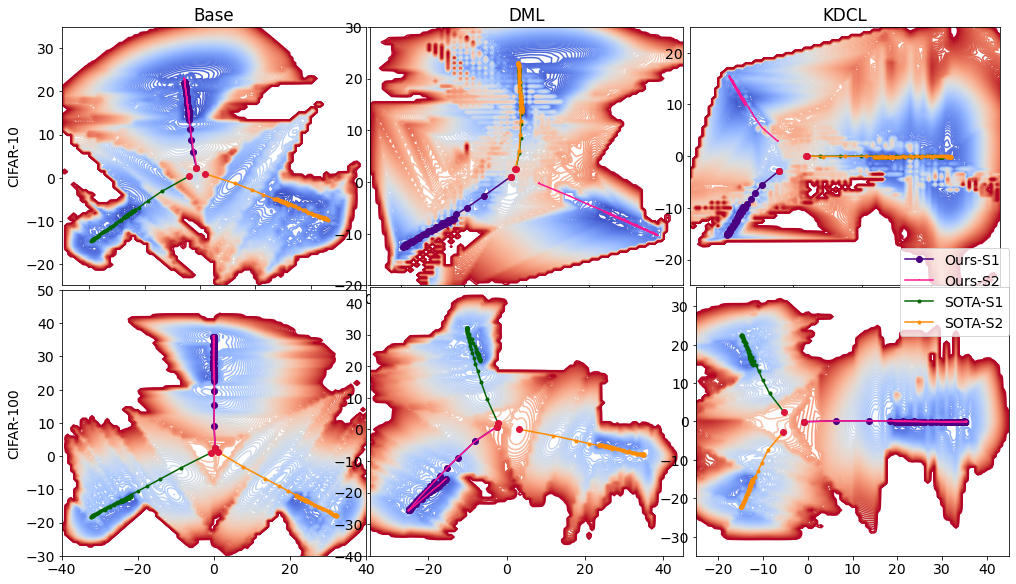

In [9]:
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2, 3, figsize=(14,8), constrained_layout=True)

plt.subplot(231)
plt.ylabel('CIFAR-10')
ii = 0
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.03, max_val=4.0, title='Base')

plt.subplot(232)
ii = 1
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.03, max_val=4.0, title='DML')

plt.subplot(233)
ii = 2
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
pcm=draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.02, max_val=4.0, title='KDCL',\
        cbar=True, loc='upper center')
# fig.colorbar(pcm, ax=[axs[0, 2:3]], location='right', label='Loss', shrink=0.6)

plt.subplot(234)
plt.ylabel('CIFAR-100')
ii = 3
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0)

plt.subplot(235)
ii = 4
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0)

plt.subplot(236)
ii = 5
xi, yi, zi = interpolator(infos[ii][1], infos[ii][0], x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101),\
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101))
pcm=draw_one(infos[ii][2], xi, yi, zi, x_tuple=(xy_bound[ii][0], xy_bound[ii][1], 101), \
    y_tuple=(xy_bound[ii][2], xy_bound[ii][3], 101), interval=0.04, max_val=6.0,\
        cbar=True, loc='upper center')

# fig.colorbar(pcm, ax=[axs[1, 2:3]], location='right', label='Loss', shrink=0.6,)
fig.legend(['Ours-S1', 'Ours-S2', 'SOTA-S1', 'SOTA-S2'], loc='center right')
plt.savefig("../figs/resnet32.pdf",format='pdf', bbox_inches = 'tight')
plt.subplot_tool()
plt.show()